# Graphs

The notebook for graphs is broken into 2 parts.

In this section, we discuss 

* Graph Theory 

* Topological Sort 

* Shortest Path 

* BFS / DFS 

## Part 1: Graph Theory 

### 1.1 Adjacency Matrices vs Lists 

Comparing space complexity: 

1) adjacency matrices: $O(V^2)$

2) adjacency lists: $O(V+E)$

<br />

Use cases:

1) dense graphs --> matrices 

2) sparse graphs --> lists 

<br />

Dealing with time complexity:

for each v in V:

&nbsp;&nbsp;&nbsp;&nbsp;for each u in adj(v):

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;O(1) operation

$\therefore$ time: $O(V+E)$

<br />

for each v in V:

&nbsp;&nbsp;&nbsp;&nbsp;for each e in E:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;O(1) operation

$\therefore$ time: $O(VE)$

<br />
<br />

## Part 2: Directed Acyclic Graphs

### 2.1 Comparision with Trees

Trees are "undirected", "connected", "acyclic" graphs. Note how that is different from DAGs. 

<br />

### 2.2 Topological Sort 

**Explanation**

The process of ordering vertices such that when $v_{i}$ is directed to $v_{j}$, $v_{i}$ will come before $v_{j}$ in the ordering. 

<br />

**Assumption**

The graph is a directed acyclic graph.

<br />

**Pseudocode**

next: queue of zero in-degree vertices 

topsort: our results to return 

indegrees: a map mapping all vertices to their in-degrees 

assume our graph is represented as an adjacency list

<br />

populate indegrees in $O(V+E)$

populate next using indegrees in $O(V)$

while next is not empty:

&nbsp;&nbsp;&nbsp;&nbsp;v = dequeue(next)

&nbsp;&nbsp;&nbsp;&nbsp;topsort.add(v)

&nbsp;&nbsp;&nbsp;&nbsp;for u in adj(v):

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;indegree[u]--

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;if indegree[u] == 0:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;next.enqueue(u)

return topsort 

<br />

**Runtime**

time: $O(V+E)$ &nbsp;&nbsp; space: $O(V+E)$

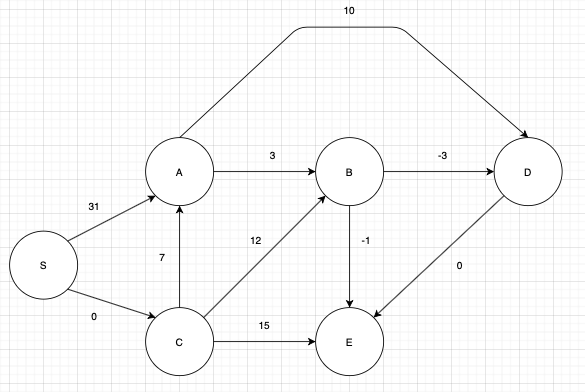



**Example**

From the picture above, topological ordering will be:

S --> C --> A --> B --> D --> E 

<br />

In [ ]:
from collections import deque 

# for simplicity, assume graph is given as pairs [[node1, node2], [node1, node3]]
# where for [X, Y], node X --> node Y  
def topological_sort(graph):
  next = deque()
  topsort = []
  indegrees = {}
  adjacent = {}

  for pair in graph:
    # populate indegrees
    if pair[0] not in indegrees:
      indegrees[pair[0]] = 0 
    indegrees[pair[1]] = indegrees.get(pair[1], 0) + 1

    # populate adjacent 
    if pair[1] not in adjacent:
        adjacent[pair[1]] = []
    if pair[0] not in adjacent:
      adjacent[pair[0]] = [pair[1]]
    else:
      adjacent[pair[0]].append(pair[1])

  # populate next 
  for key in indegrees.keys():
    if indegrees[key] == 0:
      next.append(key)
  
  while next:
    v = next.popleft()
    topsort.append(v)
    for u in adjacent[v]:
      indegrees[u] -= 1
      if indegrees[u] == 0:
        next.append(u)
  
  return topsort 

<br />

### 2.3 Shortest Path

**Assumption**

The graph is a directed acyclic graph.

<br />

**Pseudocode**

shortest[v]: shortest distance to v from the source by the end of the algorithm.

pred[v]: predecessor vertex along the shortest path from the source to v.

<br />

perform topsort 

shortest[s] = 0, all other shortest[v] = Inf

all pred[v] = null 

<br />

for each u in topsort:

&nbsp;&nbsp;&nbsp;&nbsp;for each v in adj(u):

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;if shortest[u] + wt(u,v) < shortest[v]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;shortest[v] = shortest[u] + wt(u,v)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;pred[v] = u

<br />

time: $O(V+E)$ &nbsp;&nbsp; space: $O(V+E)$


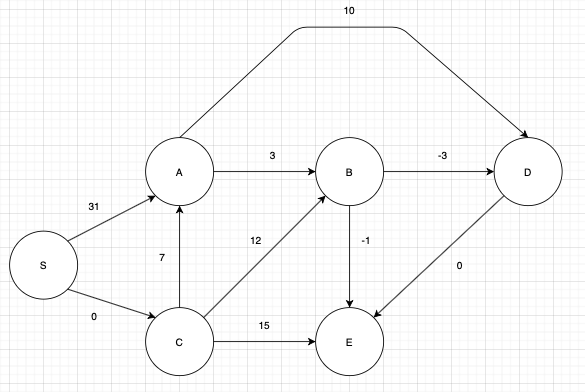

**Example**

Revisiting the picture above

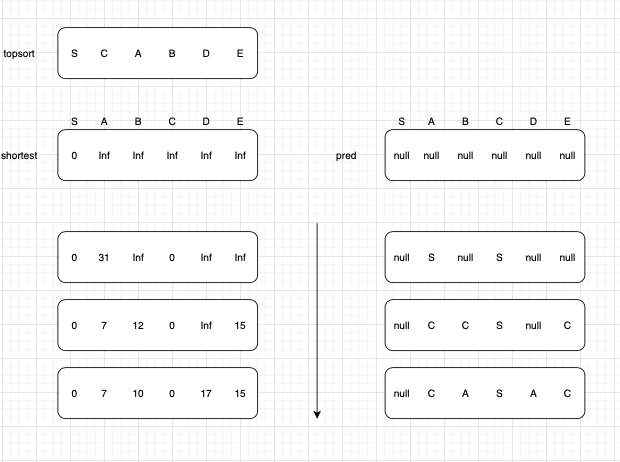

<br />
<br />

##Part 3: Graph Traversal Algorithms

### 3.1 Breadth First Search

**Explanation**

Utilizes a queue to traverse level wise 

<br />

**Pseudocode**

initialize queue as Q

Q.enqueue(source)

mark source as visited

while Q is not empty

&nbsp;&nbsp;&nbsp;&nbsp;v = dequeue(Q)

&nbsp;&nbsp;&nbsp;&nbsp;for all neighbors u of v

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;if u not visited

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Q.enqueue(u)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;mark u as visited

<br />

**Runtime**

time: $O(V+E)$ &nbsp;&nbsp; space: $O(V)$





<br />

In [ ]:
# for simplicity, assume a BFS on a binary tree 
class Node:

  def __init__(self, val):
    self.val = val
    self.left = None 
    self.right = None 
    self.parent = None 


def bfs(root):
  queue = deque([root])
  res = []
  while queue:
    node = queue.popleft()
    res.append(node.val)
    if node.left:
      queue.append(node.left)
    if node.right:
      queue.append(node.right)

<br />

### 3.2 Depth First Search

**Explanation**

Utilizes a stack to traverse depth wise 

<br />

**Pseudocode**

dfs(graph, node)

&nbsp;&nbsp;&nbsp;&nbsp;mark node as visited 

&nbsp;&nbsp;&nbsp;&nbsp;for all neighbors u of node

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;if u not visited

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;dfs(graph, u)

<br />

**Runtime**

time: $O(V+E)$ &nbsp;&nbsp; space: $O(V)$

<br />

In [ ]:
# for simplicity, assume a DFS on a binary tree
class DFS:

  def dfs(self, root):
    self.res = []
    self.dfs_recursive(root)
    return self.res 

  def dfs_recursive(self, node):
    if node:
      self.res.append(node.val)
      self.dfs_recursive(node.left)
      self.dfs_recursive(node.right)


def dfs_iterative(root):
  stack = [root]
  res = []
  while stack:
    node = stack.pop()
    res.append(node.val)
    if node.right:
      stack.append(node.right)
    if node.left:
      stack.append(node.left)



<br />

### 3.3 Inorder, Preorder, Postorder 

**Inorder**

recursively traverse left subtree

visit root 

recursively traverse right subtree

<br />

**Preorder**

visit root 

recursively traverse left subtree

recursively traverse right subtree 

<br />

**Postorder**

recursively traverse left subtree

recursively traverse right subtree

visit root 

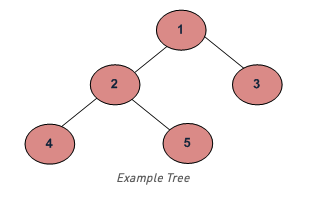

**Example**

inorder: 4 2 5 1 3 

preorder: 1 2 4 5 3 

postorder: 4 5 2 3 1 

<br />

In [ ]:
# inorder 
def dfs(root):
  if root:
    dfs(root.left)
    print(root.val)
    dfs(root.right)

# preorder
def dfs(root):
  if root:
    print(root.val)
    dfs(root.left)
    dfs(root.right)

# postorder
def dfs(root):
  if root:
    dfs(root.left)
    dfs(root.right)
    print(root.val)

<br />